In [2]:
import pandas as pd
from cosas_spotipy import *

# 1. Importar datos y filtrar

In [3]:
df = pd.read_csv("Spotify Weekly.csv")
df = df.drop(["url","time_signature","key","mode"], axis = 1)


## 1.1. Filtrar previo al 2016

In [4]:
print(f"filas iniciales: {len(df)}")
# eliminamos el 2016
df = df[df.year > 2016]
print(f"filas primer filtro: {len(df)}")
df.head(3)



filas iniciales: 52200
filas primer filtro: 52000


,position,year,start,end,track_name,artist,streams,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
200,1,2017,2016-12-30,2017-01-06,Starboy,The Weeknd,25734078,0.681,0.594,-7.028,0.2820,0.165,0.000003,0.134,0.535,186.054,230453
201,2,2017,2016-12-30,2017-01-06,Closer,The Chainsmokers,23519705,0.748,0.524,-5.599,0.0338,0.414,0.000000,0.111,0.661,95.010,244960
202,3,2017,2016-12-30,2017-01-06,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,0.720,0.763,-4.068,0.0523,0.406,0.000000,0.180,0.742,101.965,251088


## 1.2. Eliminar filas nulas 

In [5]:
df.isnull().sum()

position            0
year                0
start               0
end                 0
track_name          7
artist              7
streams             0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

In [6]:
# Se votan los nulos
df = df.dropna(axis = 0)
print(f"filas segundo filtro: {len(df)}")

filas segundo filtro: 51993


## 1.3. Ordenar datos

In [7]:
df = df.sort_values(["start","position"])
df.reset_index(drop=True, inplace=True)

# 2. Estadísticas Resumen

In [8]:
df[['danceability','energy','loudness', 'speechiness','acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']].mean().to_frame()

,0
danceability,0.694645
energy,0.631853
loudness,-6.128581
speechiness,0.113158
acousticness,0.237283
instrumentalness,0.007872
liveness,0.167300
valence,0.504907
tempo,120.058088
duration_ms,206324.583155


In [9]:
df[['danceability','energy','loudness', 'speechiness','acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']].std().to_frame()

,0
danceability,0.135100
energy,0.161958
loudness,2.391065
speechiness,0.100587
acousticness,0.239881
instrumentalness,0.053434
liveness,0.124589
valence,0.222525
tempo,29.071469
duration_ms,41785.995506


# Reproducciones anuales

In [10]:
streams_total = df[["year", "streams"]]
streams_total = streams_total.groupby("year", as_index = False).sum().sort_values("year")
streams_total.set_index("year", inplace = True)
streams_total

,streams
year,
2017,76506178881
2018,84465788692
2019,88242484766
2020,94796398526
2021,100131968788


<AxesSubplot:xlabel='year'>

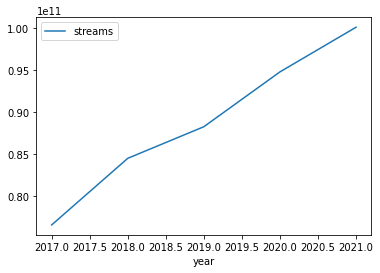

In [11]:
streams_total.plot()

# Artistas seguún streams

In [12]:
artists_streams = df[["artist","year","streams"]]
artists_streams = artists_streams.groupby(["year", "artist"], as_index = False).sum().sort_values("year")
artists_streams["position_year"] = artists_streams.groupby(["year"])["streams"].rank(ascending = False)
artists_streams.set_index("year", inplace = True)
artists_streams[artists_streams.position_year == 1]

,artist,streams,position_year
year,,,
2017,Ed Sheeran,4626030792,1.0
2018,Post Malone,4523248176,1.0
2019,Post Malone,4964093501,1.0
2020,Bad Bunny,3319513438,1.0
2021,Olivia Rodrigo,5064291089,1.0


In [13]:
artist_sum = df[["artist","track_name","streams"]]
artist_sum = artist_sum.groupby(["track_name", "artist"], as_index = False).sum().sort_values("streams", ascending = False)
artist_sum["position"] = artist_sum.groupby(["track_name", "artist"])["streams"].rank(ascending = False)
artist_sum.query( "artist == 'Post Malone'")

,track_name,artist,streams,position
3312,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2067398862,1.0
697,Circles,Post Malone,1599146210,1.0
441,Better Now,Post Malone,1220325977,1.0
4135,rockstar (feat. 21 Savage),Post Malone,1112059483,1.0
741,Congratulations,Post Malone,982927532,1.0
4134,rockstar,Post Malone,954452582,1.0
3895,Wow.,Post Malone,932133100,1.0
2732,Psycho (feat. Ty Dolla $ign),Post Malone,905310515,1.0
1599,I Fall Apart,Post Malone,745318733,1.0
1364,Goodbyes (Feat. Young Thug),Post Malone,654675084,1.0


# Apariciones en el top en los últimos 5 años por artista


In [14]:
top_aparitions = artist_sum[["artist","track_name"]]
top_aparitions = top_aparitions.groupby(["artist"], as_index = False).count()
top_aparitions["position"] = top_aparitions["track_name"].rank(ascending = False)
top_aparitions.sort_values("position", inplace= True)
top_aparitions

,artist,track_name,position
827,Taylor Swift,112,1.0
237,Drake,101,2.0
80,BTS,64,3.0
57,Ariana Grande,57,4.0
250,Ed Sheeran,56,5.0
...,...,...,...
397,Jon Bellion,1,702.5
400,Jonas Esticado,1,702.5
403,José Feliciano,1,702.5
405,Jowell & Randy,1,702.5


# Canciones artista por semana

In [15]:
artist_week = df[["year","start","artist", "streams"]]
artist_week = artist_week.groupby(["year","start", "artist"], as_index = False).count().sort_values("streams", ascending = False)
artist_week.columns = ["year","start","artist", "aparitions"]
artist_week

,year,start,artist,aparitions
30950,2021,2021-11-12,Taylor Swift,34
29525,2021,2021-08-27,Kanye West,27
1512,2017,2017-03-17,Drake,27
9805,2018,2018-07-06,Drake,26
9688,2018,2018-06-29,Drake,26
...,...,...,...,...
12607,2018,2018-12-21,Brett Eldredge,1
12606,2018,2018-12-21,Brenda Lee,1
12605,2018,2018-12-21,Bobby Helms,1
12604,2018,2018-12-21,BlocBoy JB,1


In [16]:
artist_year = artist_week[["year","artist","aparitions"]]
artist_year = artist_year.groupby(["year","artist"], as_index = False).count().sort_values("aparitions", ascending = False)
artist_year.reset_index(inplace=True)
artist_year

,index,year,artist,aparitions
0,1667,2021,J Balvin,53
1,1662,2021,Imagine Dragons,53
2,1692,2021,Justin Bieber,53
3,1608,2021,Drake,53
4,1895,2021,Tiësto,53
...,...,...,...,...
1934,290,2017,Stargate,1
1935,636,2018,Rvssian,1
1936,635,2018,Russ,1
1937,629,2018,Ray Parker Jr.,1


# Revision agrupando por año

In [17]:
top_yearly = df[["track_name","year","artist", "streams"]]
top_yearly = top_yearly.groupby(["track_name","year","artist"], as_index = False).sum().sort_values("streams", ascending = False)

top_yearly["position_year"] = top_yearly.groupby(["year"])["streams"].rank(ascending = False)
top_yearly.reset_index(inplace = True)

pl = top_yearly.year.value_counts().to_frame().sort_index()
pl.reset_index(inplace = True)
pl.columns = ["year", "songs"]
pl = pl.set_index("year")
pl
# de aqui se puede concluir cual es la cantidad de canciones distintas que se han metido al top

,songs
year,
2017,889
2018,1138
2019,1056
2020,1152
2021,1043


<AxesSubplot:xlabel='year'>

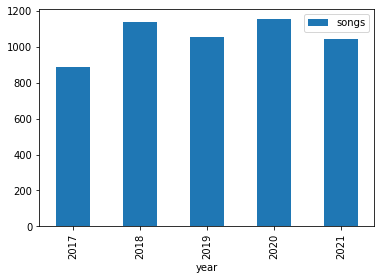

In [18]:
pl.plot.bar()

<AxesSubplot:title={'center':'canciones'}, xlabel='year'>

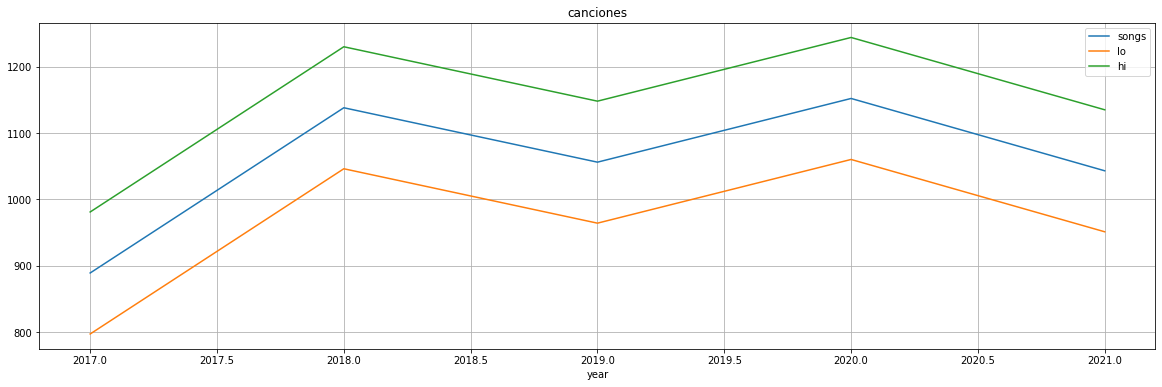

In [19]:
aux = pl
mean = aux.songs.mean()
std = aux.songs.std()

aux["lo"] = aux["songs"] - 1.96*std/5**0.5
aux["hi"] = aux["songs"] + 1.96*std/5**0.5

aux[["songs","lo","hi"]].plot(title = "canciones", grid = True, figsize = (20,6))

In [20]:
p2 = top_yearly
p2[p2.position_year == 1].sort_values("year")

,index,track_name,year,artist,streams,position_year
1,3876,Shape of You,2017,Ed Sheeran,1514648943,1.0
6,1641,God's Plan,2018,Drake,1138561345,1.0
8,3864,Señorita,2019,Shawn Mendes,1081998529,1.0
0,596,Blinding Lights,2020,The Weeknd,1660934276,1.0
3,3704,STAY (with Justin Bieber),2021,The Kid LAROI,1209831797,1.0


## Revisar grupo global

In [21]:
top_global = df[["track_name","artist", "streams"]]
top_global = top_global.groupby(["track_name","artist"], as_index = False).sum().sort_values("streams", ascending = False)

top_global["position_global"] = top_global["streams" ].rank(ascending = False)
top_global.reset_index(inplace = True)
top_global.head(10)

,index,track_name,artist,streams,position_global
0,3081,Shape of You,Ed Sheeran,2970775515,1.0
1,484,Blinding Lights,The Weeknd,2666668171,2.0
2,827,Dance Monkey,Tones And I,2411875476,3.0
3,3211,Someone You Loved,Lewis Capaldi,2143170112,4.0
4,3312,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,2067398862,5.0
5,3074,Señorita,Shawn Mendes,1968618562,6.0
6,415,Believer,Imagine Dragons,1912530286,7.0
7,3993,bad guy,Billie Eilish,1900912195,8.0
8,2653,Perfect,Ed Sheeran,1892115454,9.0
9,2079,Lucid Dreams,Juice WRLD,1745314626,10.0


## moda anual

In [22]:
moda_anual  = df[["track_name", "artist","year"]]
moda_anual = moda_anual.groupby(["track_name", "artist","year"], as_index= False).size()
moda_anual.columns = ["track_name", "artist","year","counts"]
moda_anual  = moda_anual.sort_values("counts", ascending = False)
aa = moda_anual[moda_anual.year == 2021 ]
bb = moda_anual[moda_anual.year ==2020 ]
cc = moda_anual[moda_anual.year == 2019]
dd = moda_anual[moda_anual.year == 2018]
ee = moda_anual[moda_anual.year == 2017]



In [23]:
print(aa, bb)

                           track_name              artist  year  counts
2452        Levitating (feat. DaBaby)            Dua Lipa  2021      53
872                           Circles         Post Malone  2021      53
5175             lovely (with Khalid)       Billie Eilish  2021      53
1824                          Heather          Conan Gray  2021      53
1821                       Heat Waves       Glass Animals  2021      53
...                               ...                 ...   ...     ...
1482                      First Times          Ed Sheeran  2021       1
3646              Ruff Ryders' Anthem                 DMX  2021       1
3683  SIR BAUDELAIRE (feat. DJ Drama)  Tyler, The Creator  2021       1
3677                             SHUM                Go_A  2021       1
3672                        SCIENTIST               TWICE  2021       1

[1043 rows x 4 columns]                           track_name         artist  year  counts
1706             HIGHEST IN THE ROOM   Travis

In [24]:
print(cc, dd)


                                track_name         artist  year  counts
3878                          Shape of You     Ed Sheeran  2019      51
3872                               Shallow      Lady Gaga  2019      51
5254                 when the party's over  Billie Eilish  2019      51
4872                            Without Me         Halsey  2019      51
5223            rockstar (feat. 21 Savage)    Post Malone  2019      51
...                                    ...            ...   ...     ...
3701                            STARGAZING   Travis Scott  2019       1
1384                               Fabergé            RIN  2019       1
3649  Rule The World (feat. Ariana Grande)       2 Chainz  2019       1
1425                              Fantasía          Ozuna  2019       1
0                                        !   Trippie Redd  2019       1

[1056 rows x 4 columns]                          track_name          artist  year  counts
3304                        Perfect      Ed S

In [25]:
print(ee)

                                  track_name            artist  year  counts
4319                      That's What I Like        Bruno Mars  2017      52
5121                              goosebumps      Travis Scott  2017      52
3515                                 Redbone  Childish Gambino  2017      52
3326                              Photograph        Ed Sheeran  2017      52
3154                               One Dance             Drake  2017      52
...                                      ...               ...   ...     ...
1387                                   Faint       Linkin Park  2017       1
1397  Faking It (feat. Kehlani & Lil Yachty)     Calvin Harris  2017       1
1416                                  Famous         21 Savage  2017       1
1417                                  Famous        Kanye West  2017       1
3656        Run Rudolph Run - Single Version       Chuck Berry  2017       1

[889 rows x 4 columns]


## moda global

In [26]:
moda = df[["track_name", "artist"]].value_counts().to_frame().reset_index()
moda.columns = ["track_name", "artist", "counts"]
moda.sort_values("counts", ascending = False)

,track_name,artist,counts
0,Shape of You,Ed Sheeran,256
1,Believer,Imagine Dragons,255
2,Say You Won't Let Go,James Arthur,254
3,Perfect,Ed Sheeran,249
4,goosebumps,Travis Scott,223
...,...,...,...
3321,Hands,Mac Miller,1
3320,Hands On,Kanye West,1
3319,Happy Xmas (War Is Over),Céline Dion,1
3318,Sober II (Melodrama),Lorde,1


## moda artistas

In [27]:
moda_artista = df[["artist"]].value_counts().to_frame().reset_index()
moda_artista.columns = ["artist", "counts"]
moda_artista.sort_values("counts", ascending = False)



,artist,counts
0,Ed Sheeran,1486
1,Post Malone,1389
2,Billie Eilish,1078
3,Drake,1075
4,XXXTENTACION,973
...,...,...
879,AK AUSSERKONTROLLE,1
878,Iggy Azalea,1
877,Irama,1
876,Ghali,1


# Canción más escuchada por año

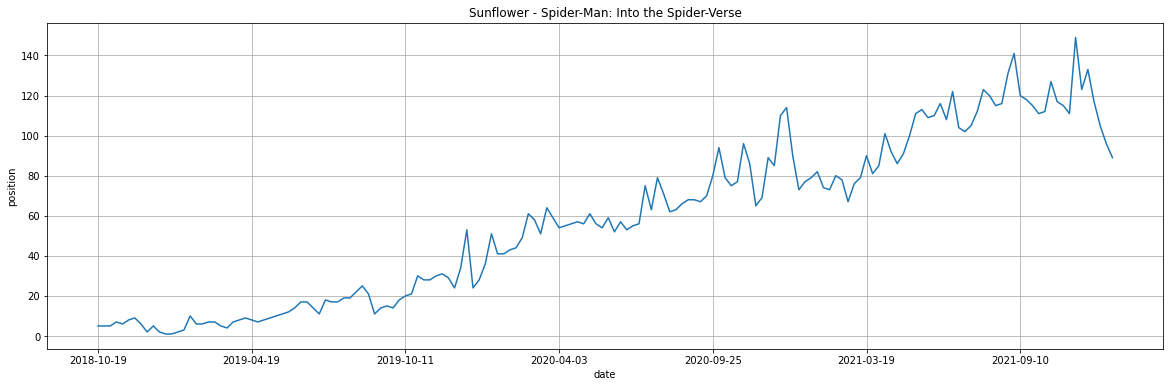

In [28]:
graficar(df, "Sunflower - Spider-Man: Into the Spider-Verse" , "position")

Text(0, 0.5, 'streams')

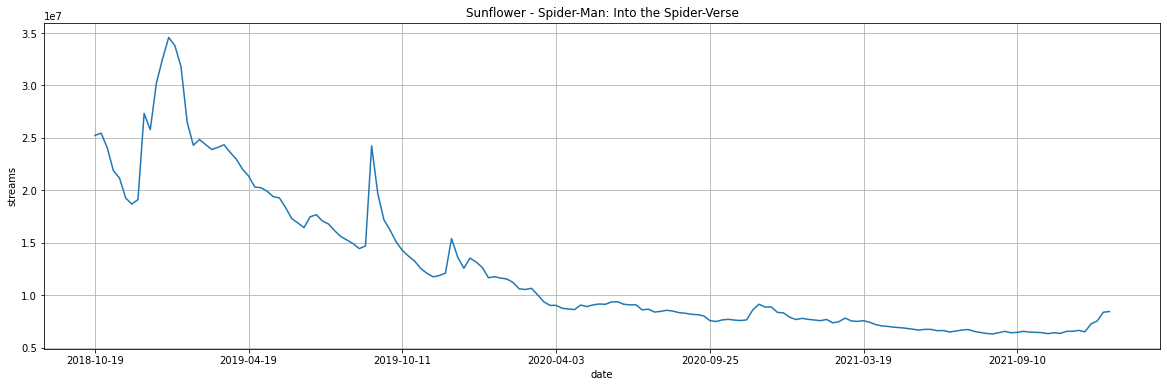

In [29]:

name = "Sunflower - Spider-Man: Into the Spider-Verse"
sng = df[df.track_name == name]
sng.index = sng.start
ax = sng["streams"].plot(title = name, grid = True, figsize = (20,6))
ax.set_xlabel("date")
ax.set_ylabel("streams")

In [30]:
df[df["instrumentalness"] > 0.5].groupby("track_name").mean()

,position,year,streams,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_name,,,,,,,,,,,,,
Alien Blues,161.000000,2021.000000,6.128854e+06,0.464,0.682,-8.541,0.0330,0.076800,0.832,0.0856,0.4550,80.062,156057.0
Astronomia,141.750000,2020.000000,5.304811e+06,0.653,0.945,-2.634,0.0960,0.005610,0.915,0.4390,0.3250,126.093,198095.0
Beautiful Trip,183.000000,2020.000000,6.108393e+06,0.331,0.513,-15.392,0.6320,0.972000,0.953,0.8820,0.4200,133.971,37013.0
Butter (Instrumental),95.000000,2021.000000,7.450126e+06,0.429,0.387,-7.486,0.0753,0.000178,0.802,0.1420,0.4100,109.893,162147.0
Chromatica I,93.000000,2020.000000,6.630385e+06,0.231,0.457,-10.773,0.0318,0.012600,0.875,0.3270,0.0588,65.827,60400.0
Chromatica II,87.000000,2020.000000,7.136521e+06,0.184,0.297,-14.534,0.0359,0.473000,0.893,0.5270,0.1130,75.824,41867.0
Freaks,91.628571,2021.000000,7.817789e+06,0.346,0.944,-9.874,0.0485,0.000042,0.565,0.0546,0.4030,179.630,147036.0
Hypnotised,157.000000,2017.000000,3.658010e+06,0.513,0.683,-6.185,0.0320,0.339000,0.739,0.0871,0.1530,120.056,355172.0
In My Room,182.000000,2019.000000,4.615538e+06,0.861,0.647,-7.425,0.0675,0.594000,0.661,0.1140,0.6700,158.037,133680.0


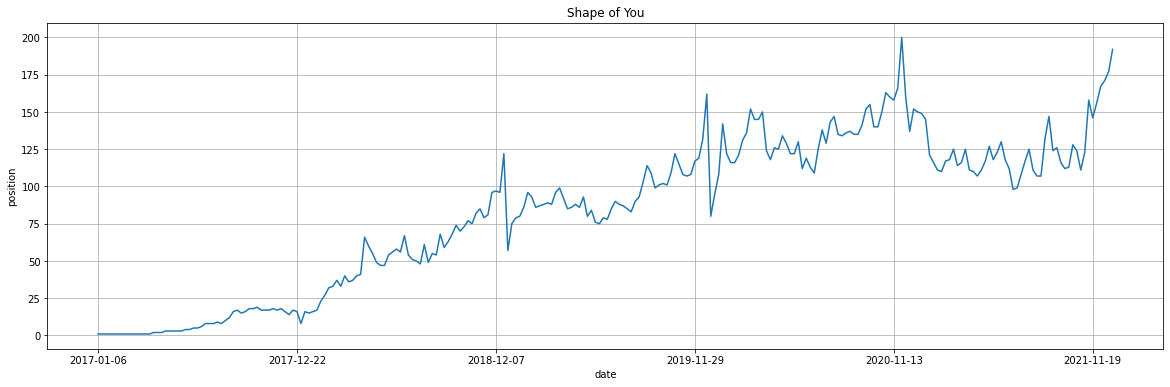

In [31]:
graficar(df, "Shape of You" , "position")

In [32]:
graficar

<function cosas_spotipy.graficar(df_out, name, type='streams')>

In [33]:
df

,position,year,start,end,track_name,artist,streams,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1,2017,2016-12-30,2017-01-06,Starboy,The Weeknd,25734078,0.681,0.594,-7.028,0.2820,0.1650,0.000003,0.1340,0.5350,186.054,230453
1,2,2017,2016-12-30,2017-01-06,Closer,The Chainsmokers,23519705,0.748,0.524,-5.599,0.0338,0.4140,0.000000,0.1110,0.6610,95.010,244960
2,3,2017,2016-12-30,2017-01-06,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,0.720,0.763,-4.068,0.0523,0.4060,0.000000,0.1800,0.7420,101.965,251088
3,4,2017,2016-12-30,2017-01-06,Let Me Love You,DJ Snake,19852704,0.476,0.718,-5.309,0.0576,0.0784,0.000010,0.1220,0.1420,199.864,205947
4,5,2017,2016-12-30,2017-01-06,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,18316326,0.735,0.451,-8.374,0.0585,0.0631,0.000013,0.3250,0.0862,117.973,245200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51988,196,2021,2021-12-24,2021-12-31,Circles,Post Malone,5665497,0.704,0.758,-3.537,0.0402,0.2330,0.001440,0.0924,0.5340,120.003,214907
51989,197,2021,2021-12-24,2021-12-31,MIDDLE OF THE NIGHT,Elley Duhé,5658747,0.410,0.611,-8.271,0.0467,0.0228,0.000000,0.1160,0.0899,185.727,184448
51990,198,2021,2021-12-24,2021-12-31,The Nights,Avicii,5631220,0.527,0.835,-5.298,0.0433,0.0166,0.000000,0.2490,0.6540,125.983,176658
51991,199,2021,2021-12-24,2021-12-31,Merry Xmas Everybody,Slade,5611874,0.405,0.752,-5.452,0.0394,0.1380,0.000000,0.1730,0.4330,130.228,223684


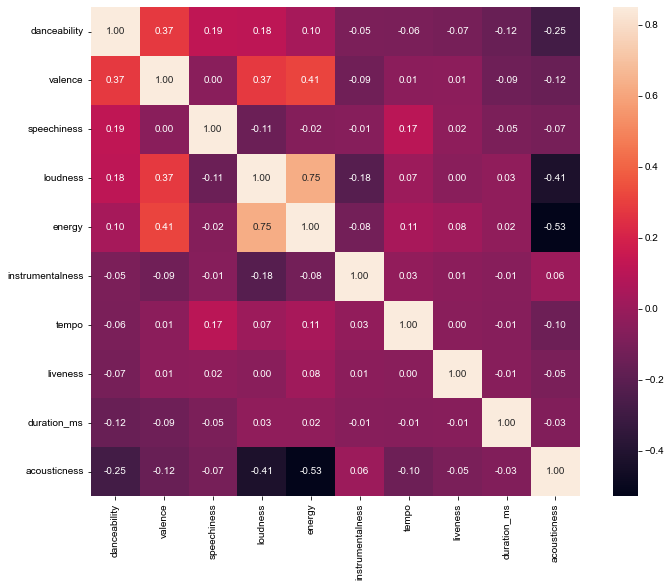

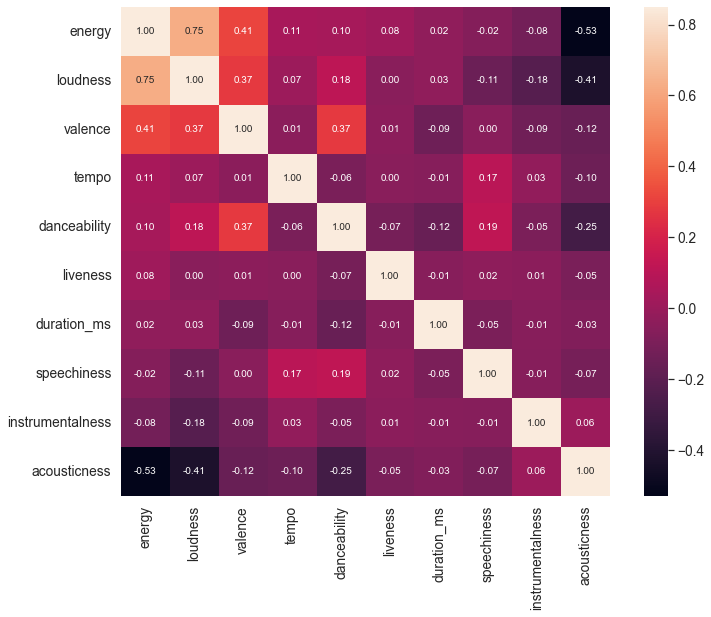

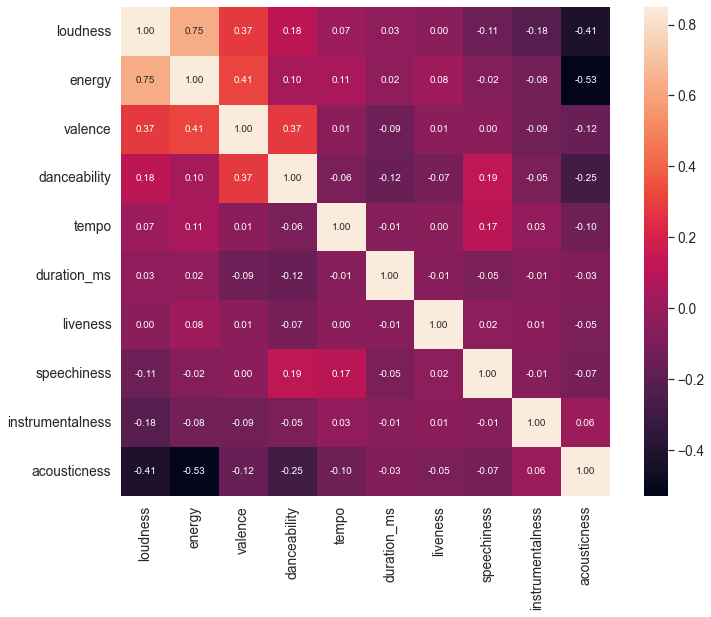

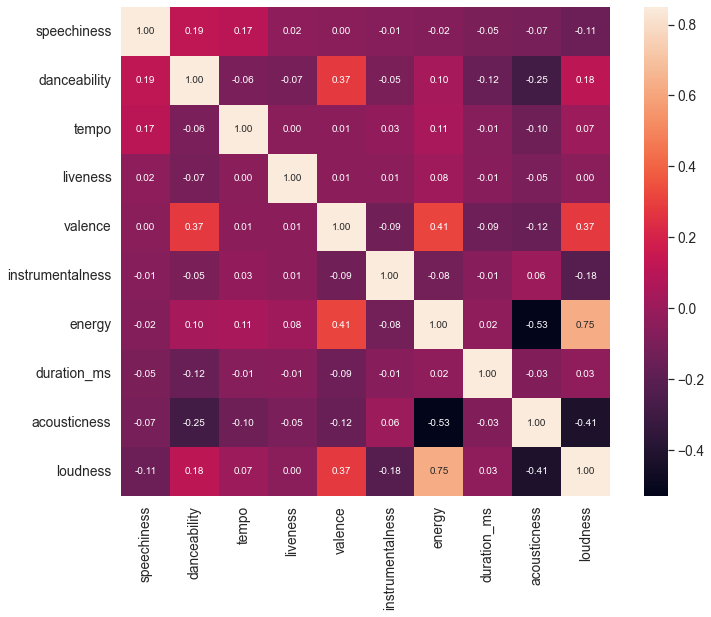

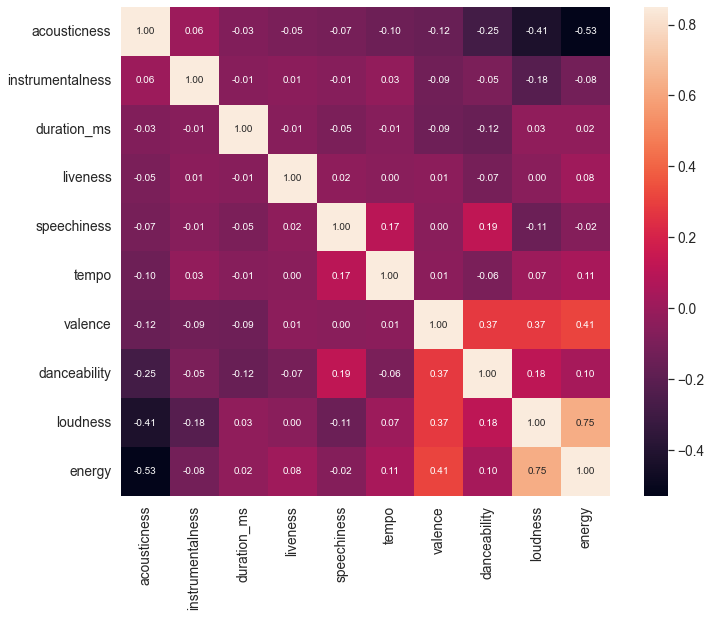

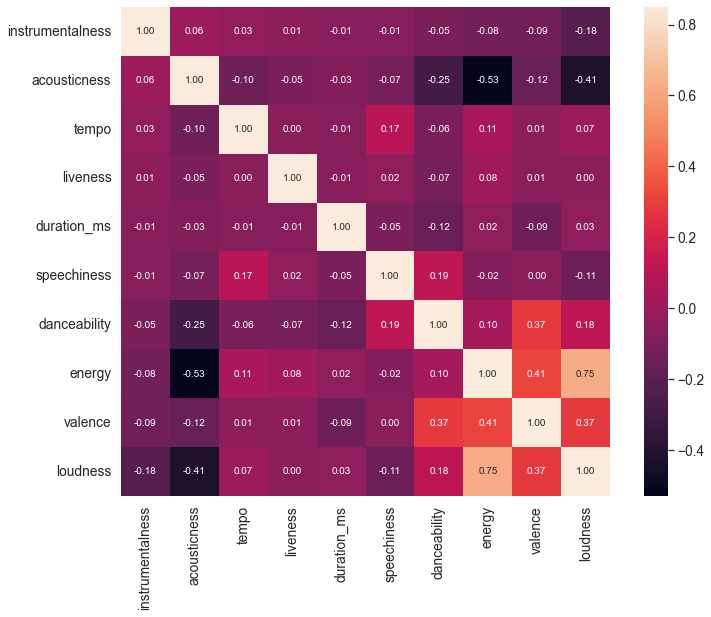

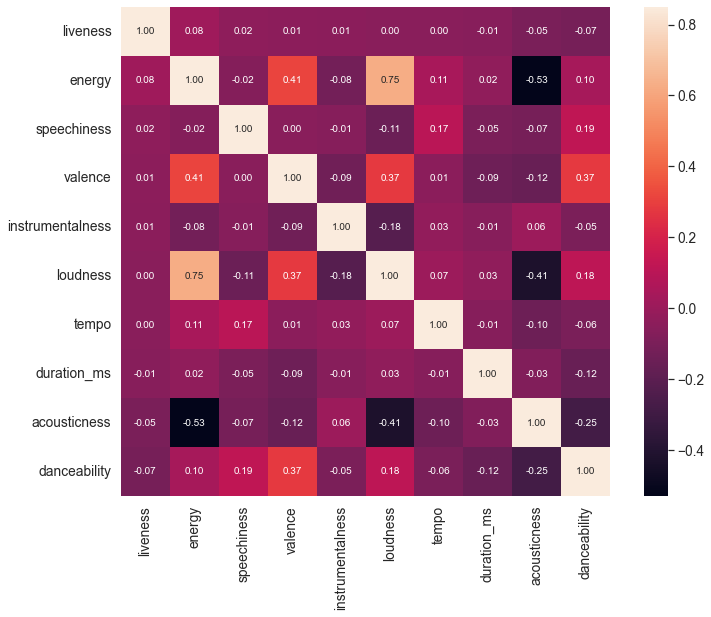

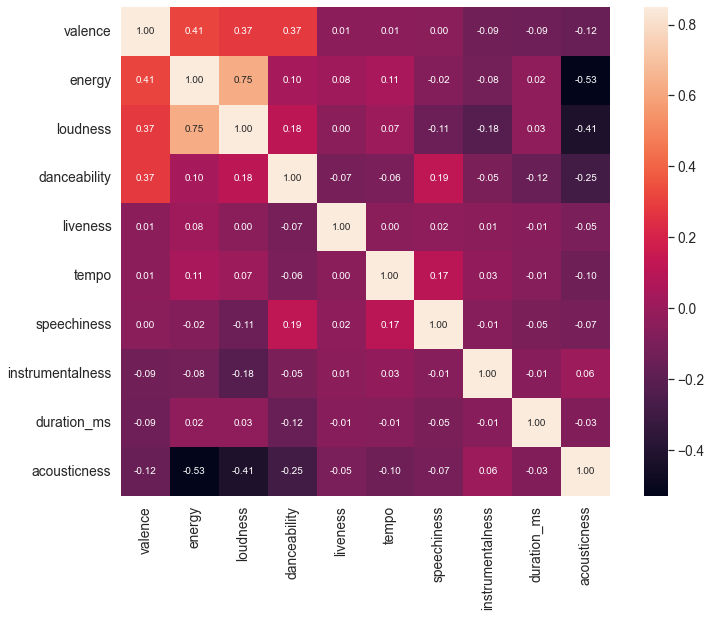

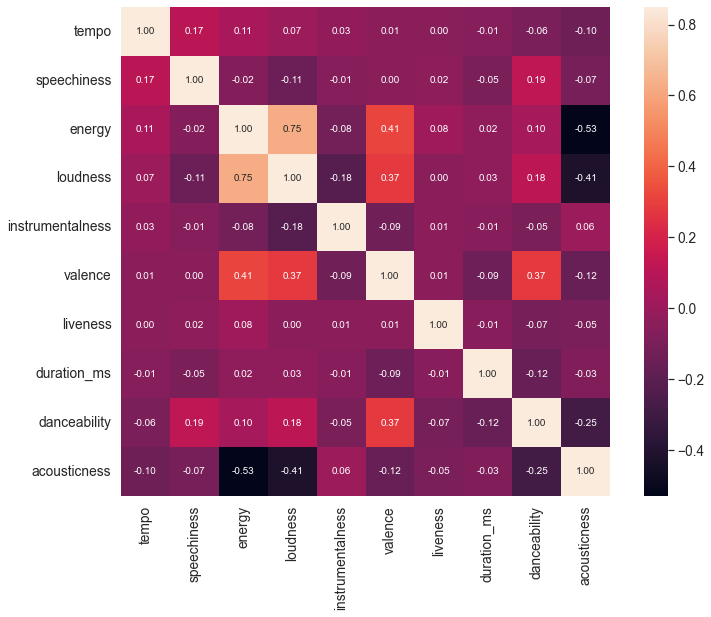

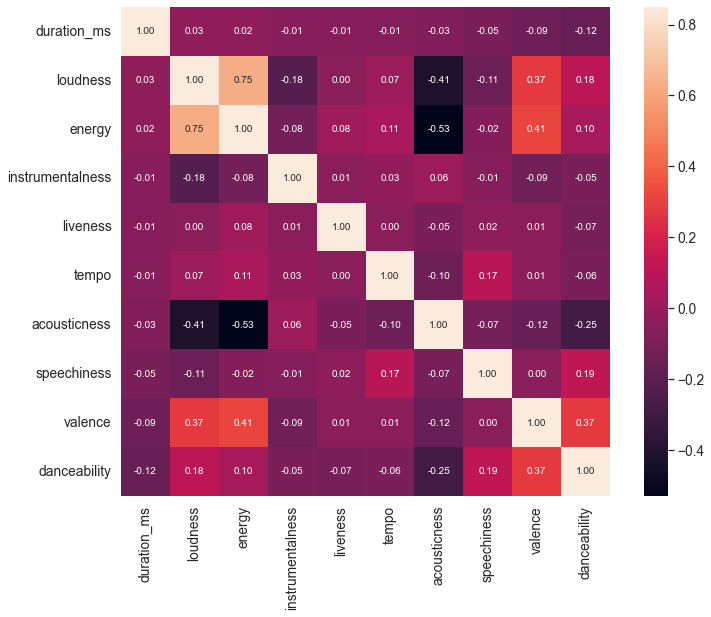

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
a = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
aa =  ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
          'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
for i in range(10):
    cormat = a.corr()
    f, ax = plt.subplots(figsize=(12,9))
    sns.heatmap(cormat, vmax= .85, square=True)

    k = 10
    cols = cormat.nlargest(k,aa[i])[aa[i]].index
    cols

    cm = np.corrcoef(a[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)


In [35]:
a = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

a

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']